# Explore Cifar-10 dataset

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from pathlib import Path

import numpy as np

from tensorflow.keras import datasets

import matplotlib.pyplot as plt

from PIL import Image

load_dotenv(find_dotenv())

True

## Downlad images

Set variables to describe images metadata

In [2]:
img_rows = 32
img_cols = 32
channels = 3

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
images = np.vstack((X_train, X_test))
labels = np.vstack((y_train, y_test))

## Display some images

In [5]:
def get_random_img():
    idx = np.random.randint(0, images.shape[0])
    return images[idx]

def plot_random_images(samples=4):
    ncols = 2
    fig, ax = plt.subplots(nrows=samples // ncols, ncols=ncols, figsize=(10,10))
    
    for row in ax:
        for col in row:
            col.axis("off")
            col.imshow(get_random_img())

    plt.show()

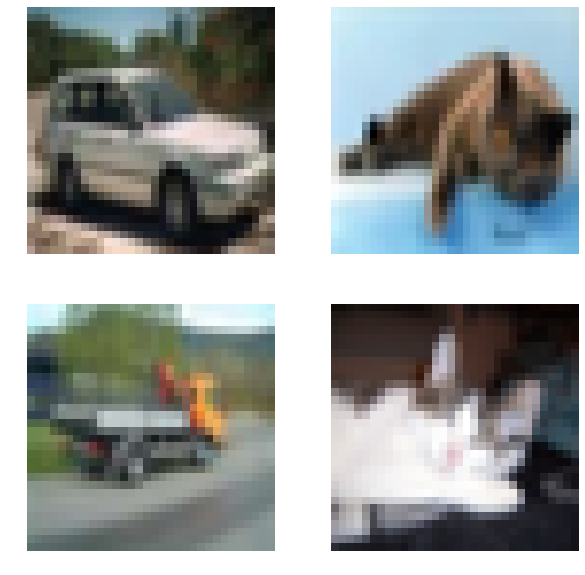

In [6]:
plot_random_images()

## Add random mask to images

In [7]:
def mask_randomly(imgs, mask_height=8, mask_width=8):
    y1 = np.random.randint(0, img_rows - mask_height, imgs.shape[0])
    y2 = y1 + mask_height
    x1 = np.random.randint(0, img_rows - mask_width, imgs.shape[0])
    x2 = x1 + mask_width

    masked_imgs = np.empty_like(imgs)
    missing_parts = np.zeros((imgs.shape[0], mask_height, mask_width, channels))
    for i, img in enumerate(imgs):
        masked_img = img.copy()
        _y1, _y2, _x1, _x2 = y1[i], y2[i], x1[i], x2[i]
        missing_parts[i, :, :, :] = masked_img[_y1:_y2, _x1:_x2, :].copy()
        masked_img[_y1:_y2, _x1:_x2, :] = 0
        masked_imgs[i] = masked_img

    return masked_imgs, missing_parts, (y1, y2, x1, x2)

def plot_random_images(samples=4, masked=True):
    ncols = 2
    fig, ax = plt.subplots(nrows=samples // ncols, ncols=ncols, figsize=(10,10))
    _images = [get_random_img() for _ in range(samples)]
    if masked:
        _images, _, _ = mask_randomly(np.array(_images))
    
    i = 0
    for row in ax:
        for col in row:
            col.axis("off")
            col.imshow(_images[i])
            i += 1

    plt.show()

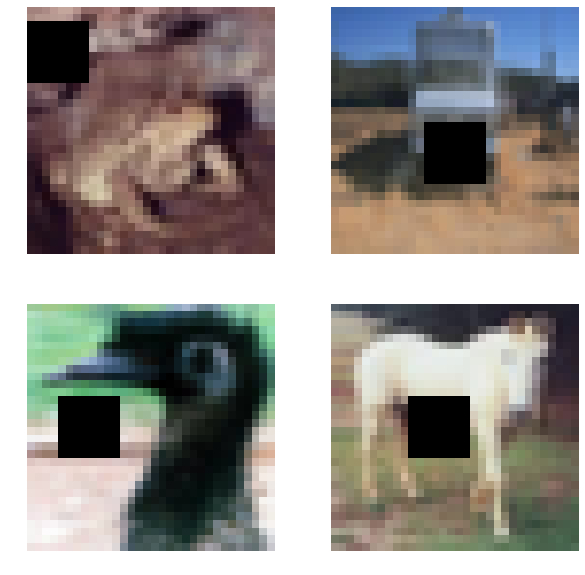

In [8]:
plot_random_images(masked=True)

## Save to png

In [12]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def save(image, filepath, name):
    filepath.mkdir(parents=True, exist_ok=True)
    img = Image.fromarray(image)
    img = img.convert('RGB')
    img.save(filepath.joinpath(name + '.png'), "PNG")

def save_image_set(set_name, X, y):
    i = 0
    for image, label in zip(X, y):
        filepath = Path(os.environ['DATA_DIR'], 'raw', set_name, label_names[label[0]])
        name = str(i)
        save(image, filepath, name)
        i += 1

In [ ]:
save_image_set('train', X_train, y_train)

In [13]:
save_image_set('test', X_test, y_test)       